This study guide should reinforce and provide practice for all of the concepts you have seen in the past week. There are a mix of written questions and coding exercises, both are equally important to prepare you for the sprint challenge as well as to be able to speak on these topics comfortably in interviews and on the job.

If you get stuck or are unsure of something remember the 20 minute rule. If that doesn't help, then research a solution with google and stackoverflow. Only once you have exausted these methods should you turn to your Team Lead - they won't be there on your SC or during an interview. That being said, don't hesitate to ask for help if you truly are stuck.

Have fun studying!

# Resources
[Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)

[Matplotlib Documentation](https://matplotlib.org/3.1.1/api/pyplot_summary.html)

[Pandas EDA Cheat Sheet](https://github.com/bundickm/CheatSheets/blob/master/Data_Cleaning_and_Exploring_Cheat_Sheet.ipynb)

[Pandas Data Wrangling Cheat Sheet](https://github.com/bundickm/CheatSheets/blob/master/Data_wrangling_cheatsheet.pdf)

[Matplotlib Cheat Sheet](https://github.com/bundickm/CheatSheets/blob/master/MatplotLib_Cheat_Sheet.ipynb)

In [0]:
# - Loading datasets from a url or local file.
# - Using basic Pandas functions for EDA including making simple graphs with Pandas
# - Checking for null values and replacing/filling atypical missing value indicators (like " ?" for example) with NaNs.
# - Use the apply function to clean a dataframe column or to make a new column on a dataframe
# - Use dataframe filtering to select a subset of the rows of a df based on conditions
# - Concatenate dataframes by rows or by columns
# - Merge dataframes
# - Translate dataframes between tidy and wide formats using .melt()/.pivot_table()
# - Replicate a basic FiveThirtyEight graph specifically controlling the graph's
# 	- Title
# 	- Subtitle
# 	- x and y axis labels & tick marks
# 	- plot (the data on the graph)
# 	- legend / text annotations / line colors (some way to be able to know what different lines on a graph (line plot) are representing)

# Setup

Import and alias the following libraries:
- numpy
- pandas
- matplot
- seaborn

In [0]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

Read in the auto data csv below and verify it's contents

In [0]:
auto_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'

In [0]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data')

In [5]:
print (df.shape)
df.head()


(204, 26)


,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


You should see there are no column headers. Read in the csv with the column names below and then check the first 5 and last 5 rows of the data frame

In [0]:
 columns = ['symboling','norm_loss','make','fuel','aspiration','doors',
           'bod_style','drv_wheels','eng_loc','wheel_base','length','width',
           'height','curb_weight','engine','cylinders','engine_size',
           'fuel_system','bore','stroke','compression','hp','peak_rpm',
           'city_mpg','hgwy_mpg','price']

In [0]:
df = pd.read_csv(auto_url, header=None, names=columns)

In [8]:
df.head()

,symboling,norm_loss,make,fuel,aspiration,doors,bod_style,drv_wheels,eng_loc,wheel_base,length,width,height,curb_weight,engine,cylinders,engine_size,fuel_system,bore,stroke,compression,hp,peak_rpm,city_mpg,hgwy_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


 Check for nulls and any values that may be a placeholder for nulls

In [9]:
df.isnull().sum()

symboling      0
norm_loss      0
make           0
fuel           0
aspiration     0
doors          0
bod_style      0
drv_wheels     0
eng_loc        0
wheel_base     0
length         0
width          0
height         0
curb_weight    0
engine         0
cylinders      0
engine_size    0
fuel_system    0
bore           0
stroke         0
compression    0
hp             0
peak_rpm       0
city_mpg       0
hgwy_mpg       0
price          0
dtype: int64

Replace the placeholders with `NaN` and then recheck for nulls.

In [10]:
df = df.replace({'?': np.NaN})
df.head()

,symboling,norm_loss,make,fuel,aspiration,doors,bod_style,drv_wheels,eng_loc,wheel_base,length,width,height,curb_weight,engine,cylinders,engine_size,fuel_system,bore,stroke,compression,hp,peak_rpm,city_mpg,hgwy_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [11]:
df.isnull().sum().sort_values()

symboling       0
city_mpg        0
compression     0
fuel_system     0
engine_size     0
cylinders       0
engine          0
curb_weight     0
hgwy_mpg        0
width           0
height          0
wheel_base      0
eng_loc         0
drv_wheels      0
bod_style       0
aspiration      0
fuel            0
make            0
length          0
doors           2
hp              2
peak_rpm        2
bore            4
stroke          4
price           4
norm_loss      41
dtype: int64

In [12]:
df.dtypes

symboling        int64
norm_loss       object
make            object
fuel            object
aspiration      object
doors           object
bod_style       object
drv_wheels      object
eng_loc         object
wheel_base     float64
length         float64
width          float64
height         float64
curb_weight      int64
engine          object
cylinders       object
engine_size      int64
fuel_system     object
bore            object
stroke          object
compression    float64
hp              object
peak_rpm        object
city_mpg         int64
hgwy_mpg         int64
price           object
dtype: object

# Exploration

Find the following information about the dataframe:
- Get the descriptive statistics for ALL features (numeric and categorical)
- Get the data types for all features
- What are the unique values for the `doors` column
- How many rows and columns are in the dataframe?

In [13]:
#Get the descriptive statistics for ALL features (numeric and categorical)

df.describe(include='all')

,symboling,norm_loss,make,fuel,aspiration,doors,bod_style,drv_wheels,eng_loc,wheel_base,length,width,height,curb_weight,engine,cylinders,engine_size,fuel_system,bore,stroke,compression,hp,peak_rpm,city_mpg,hgwy_mpg,price
count,205.000000,164,205,205,205,203,205,205,205,205.000000,205.000000,205.000000,205.000000,205.000000,205,205,205.000000,205,201,201,205.000000,203,203,205.000000,205.000000,201
unique,NaN,51,22,2,2,2,5,3,2,NaN,NaN,NaN,NaN,NaN,7,7,NaN,8,38,36,NaN,59,23,NaN,NaN,186
top,NaN,161,toyota,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,7957
freq,NaN,11,32,185,168,114,96,120,202,NaN,NaN,NaN,NaN,NaN,148,159,NaN,94,23,20,NaN,19,37,NaN,NaN,2
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,174.049268,65.907805,53.724878,2555.565854,NaN,NaN,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,12.337289,2.145204,2.443522,520.680204,NaN,NaN,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.100000,52.000000,2145.000000,NaN,NaN,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.100000,66.900000,55.500000,2935.000000,NaN,NaN,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [14]:
df.dtypes

symboling        int64
norm_loss       object
make            object
fuel            object
aspiration      object
doors           object
bod_style       object
drv_wheels      object
eng_loc         object
wheel_base     float64
length         float64
width          float64
height         float64
curb_weight      int64
engine          object
cylinders       object
engine_size      int64
fuel_system     object
bore            object
stroke          object
compression    float64
hp              object
peak_rpm        object
city_mpg         int64
hgwy_mpg         int64
price           object
dtype: object

In [15]:
#What are the unique values for the doors column

len(df['doors'].value_counts())

2

In [16]:
print (df['doors'])

0       two
1       two
2       two
3      four
4      four
       ... 
200    four
201    four
202    four
203    four
204    four
Name: doors, Length: 205, dtype: object


In [17]:
df.shape

(205, 26)

# Cleaning and Feature Engineering

Complete the following actions on the dataframe:
- Fill in the null values in the dataframe without dropping any rows or columns
- Convert the `doors` column to `int`
- Drop the `eng_loc` column
- Create a new column in the df that is the `hp` divided by `price`

In [18]:

df = df.replace({np.NaN : '?'})
df.head()

,symboling,norm_loss,make,fuel,aspiration,doors,bod_style,drv_wheels,eng_loc,wheel_base,length,width,height,curb_weight,engine,cylinders,engine_size,fuel_system,bore,stroke,compression,hp,peak_rpm,city_mpg,hgwy_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [19]:
df.isnull().sum()

symboling      0
norm_loss      0
make           0
fuel           0
aspiration     0
doors          0
bod_style      0
drv_wheels     0
eng_loc        0
wheel_base     0
length         0
width          0
height         0
curb_weight    0
engine         0
cylinders      0
engine_size    0
fuel_system    0
bore           0
stroke         0
compression    0
hp             0
peak_rpm       0
city_mpg       0
hgwy_mpg       0
price          0
dtype: int64

In [20]:
#Convert the doors column to int

def doors_to_int(cell_contents):
  if cell_contents == 'two':
    return int(2)
  if cell_contents == 'four':
    return int(4)

df['doors'] = df['doors'].apply(doors_to_int)

print(df['doors'])

0      2.0
1      2.0
2      2.0
3      4.0
4      4.0
      ... 
200    4.0
201    4.0
202    4.0
203    4.0
204    4.0
Name: doors, Length: 205, dtype: float64


In [21]:
#Drop the eng_loc column

df.drop('eng_loc', axis=1)

,symboling,norm_loss,make,fuel,aspiration,doors,bod_style,drv_wheels,wheel_base,length,width,height,curb_weight,engine,cylinders,engine_size,fuel_system,bore,stroke,compression,hp,peak_rpm,city_mpg,hgwy_mpg,price
0,3,?,alfa-romero,gas,std,2.0,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,2.0,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,2.0,hatchback,rwd,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,4.0,sedan,fwd,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,4.0,sedan,4wd,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,4.0,sedan,rwd,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,4.0,sedan,rwd,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,4.0,sedan,rwd,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,4.0,sedan,rwd,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [22]:
#Create a new column in the df that is the hp divided by price

def hp_to_int(s):
  if s == '?':
    return 0
  else:
    return int(float(s))

df['hp'] = df['hp'].apply(hp_to_int)

df['price'] = df['price'].apply(hp_to_int)

df['hp_price'] = df['hp'] / df['price']

print (df['hp_price'])

0      0.008225
1      0.006727
2      0.009333
3      0.007312
4      0.006590
         ...   
200    0.006768
201    0.008401
202    0.006237
203    0.004717
204    0.005039
Name: hp_price, Length: 205, dtype: float64


What does it mean to engineer a feature?

In [0]:
# To draw out new information from the existing columns and assign it a new column

What is a `NaN` and why do we care about them?

In [0]:
# A NaN is "Not a Number" or Null value - We care about them because
# they indicate a missing value, and they cause the rest of the column
# to be floats

# Basic Visualizations

Make the following basic graphs with the features in the dataframe:
- Line Plot
- Scatterplot
- Histogram
- Bar Graph
- Density

All graphs should have a title, and label for each axis

Text(0, 0.5, 'Highway MPG')

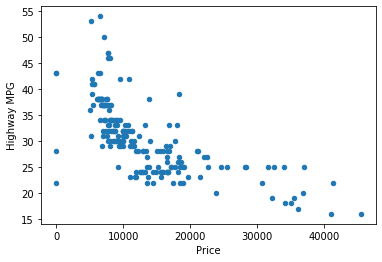

In [25]:
# Scatter Plot

ax = df.plot(kind='scatter', x='price', y='hgwy_mpg')

# Set the x scale because otherwise it goes into weird negative numbers

# Set the x-axis label

ax.set_xlabel("Price")

# Set the y-axis label

ax.set_ylabel("Highway MPG")

Text(0, 0.5, 'Highway MPG')

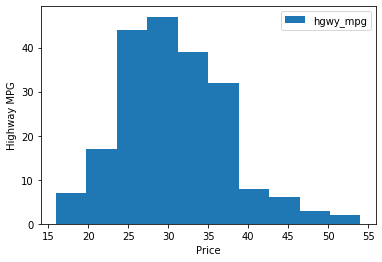

In [26]:

#Histogram

ax = df.plot(kind='hist', x='price', y='hgwy_mpg')

# Set the x scale because otherwise it goes into weird negative numbers

# Set the x-axis label

ax.set_xlabel("Price")

# Set the y-axis label

ax.set_ylabel("Highway MPG")

[Text(0, 0.5, 'Peak RPM'),
 Text(0.5, 0, 'Cylinders'),
 Text(0.5, 1.0, 'Cylinders by Peak RPM')]

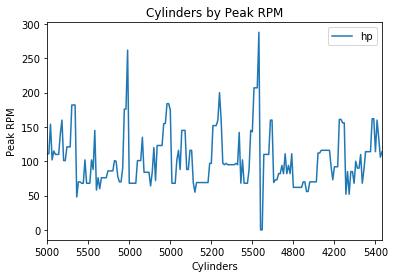

In [27]:
#Line Plot

ax = df.plot('peak_rpm', 
        'hp')

ax.set(title = "Cylinders by Peak RPM",
       xlabel = "Cylinders", 
       ylabel = "Peak RPM")

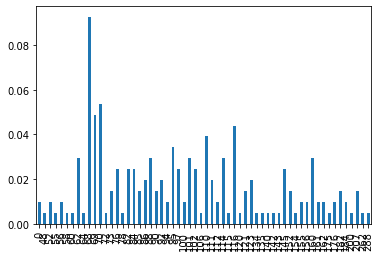

In [28]:

(df['hp']
 .value_counts(normalize=True)
 .sort_index()
 .plot(kind='bar'))


# ax = df.plot(kind='bar', x='doors', y='hp')

# # Set the x scale because otherwise it goes into weird negative numbers

# # Set the x-axis label

# ax.set_xlabel("Price")

# # Set the y-axis label

# ax.set_ylabel("Highway MPG")

# ax.set_ylim(0,200)

# ax.set_xlim(0,20)


NameError: ignored

Name a graph you would use for the following cases:
- Distribution
- Change Over Time
- Correlation

You may find the answers in the Resources section above or through Google

# Crosstabs and Pivot Tables

Complete the following:
- Make a crosstab of two of the categorical features
 - In a sentence or two, explain how to read the table and what the values mean
 - Make a graph from the crosstab
- Make a crosstab with a categorical feature and `price`
 - Use `pd.cut` to create 5 bins for `price`
 - In a sentence or two, explain how to read the table and what the values mean
 - Make a graph from the crosstab
- Create a [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html)
 - In a sentence or two, explain how to read the table and what the values mean

,symboling,norm_loss,make,fuel,aspiration,doors,bod_style,drv_wheels,eng_loc,wheel_base,length,width,height,curb_weight,engine,cylinders,engine_size,fuel_system,bore,stroke,compression,hp,peak_rpm,city_mpg,hgwy_mpg,price,hp_price,price_cut
0,3,?,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,0.008225,NaN
1,3,?,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,0.006727,NaN
2,1,?,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,0.009333,NaN
3,2,164,audi,gas,std,4.0,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,0.007312,NaN
4,2,164,audi,gas,std,4.0,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,0.006590,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,4.0,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845,0.006768,NaN
201,-1,95,volvo,gas,turbo,4.0,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045,0.008401,NaN
202,-1,95,volvo,gas,std,4.0,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485,0.006237,NaN
203,-1,95,volvo,diesel,turbo,4.0,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470,0.004717,NaN


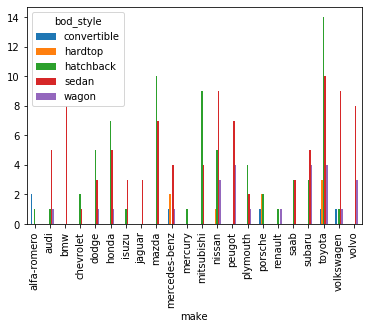

In [43]:

pd.crosstab(df['make'], df['bod_style']).plot(kind='bar')

df['price_cut'] = pd.cut(df.price, bins= [0,20,40,60,80,100])

df

In [33]:
df.pivot_table(index='make', columns='bod_style', aggfunc={'bod_style':len}, fill_value=0)

bod_style                              
bod_style     convertible hardtop hatchback sedan wagon
make                                                   
alfa-romero             2       0         1     0     0
audi                    0       0         1     5     1
bmw                     0       0         0     8     0
chevrolet               0       0         2     1     0
dodge                   0       0         5     3     1
honda                   0       0         7     5     1
isuzu                   0       0         1     3     0
jaguar                  0       0         0     3     0
mazda                   0       0        10     7     0
mercedes-benz           1       2         0     4     1
mercury                 0       0         1     0     0
mitsubishi              0       0         9     4     0
nissan                  0       1         5     9     3
peugot                  0       0         0     7     4
plymouth                0       0         4     2     1
porsche                 1       2         2     0     0
renault                 0       0         1     0     1
saab                    0       0         3     3     0
subaru                  0       0         3     5     4
toyota                  1       3        14    10     4
volkswagen              1       0         1     9     1
volvo                   0       0         0     8     3

# Interpretations

Write a short paragraph explaining some of the things you learned from the dataset. Avoid low hanging fruit like simply writing about the different descriptive stats. Focus on interesting relationships between columns, what you see in the graphs, etc.

# Tidy and Join

Combine `df_a`, `df_b`, and `df_c` joining on the ids in `df_a` to reveal the real names of The Hulk, Spiderman, and Superman.

In [0]:
df_a = pd.DataFrame({'id_b':[1,2,3], 'id_c': [4,5,6]})
df_a

In [0]:
df_b = pd.DataFrame({'id':[1,2,3], 'first_name': ['Bruce', 'Peter', 'Clark']})
df_b

In [0]:
df_c = pd.DataFrame({'id': [4,5,6], 'last_name': ['Banner', 'Parker', 'Kent']})
df_c

Use `melt` to change the dataframe below to look like the image below.

In [0]:
messy = pd.DataFrame({'a': ['A', 'B', 'C'], 
                      'b': [1, 2, 3],
                      'c': [4, 5, 6],
                      'd': [7, 8, 9]})

messy.reset_index()

Make this:

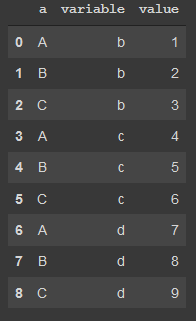

In a sentence or two, explain what the tidy data format is.

What are the types of joins?

# Snazzy Graphs

Pick a graph from FiveThirtyEight and try to recreate it. Focus on the following items:
- All text in the orginal graph (except the watermark) is present in your graph and in the same locations
- All text in your graph is roughly the same size and look of the original graph
- Gridlines, Ticklabels, and tickmark spacing matches
- Coloring and/or style matches.